# Enunciado del problema
La anemia de células falciformes es una alteración de la sangre que hace que los glóbulos rojos
se deformen hasta adquirir una forma elongada, en vez de circular.

Esta práctica consiste en clasificar un conjunto de células en tres clases diferentes
(circulares - c, elongadas - e u otras - o) usando el **mínimo de características posibles**.

<img alt="Glóbulos rojos en la sangre" src="example.jpeg" width="600"/>

# Descripción del dataset
El dataset está formado por cuatro archivos CSV que contienen diferentes atributos sobre cada célula.
Cada célula está identificada por un ID único, para poder ser reconocida en los diferentes archivos.

Los cuatro archivos de datos son los siguientes:
- `info.csv`: Contiene el path a la imagen de la célula en cuestión y su clase.
- `color.csv`: Contiene todas las características referentes al color extraídas de cada célula.
- `shape.csv`: Contiene todas las características referentes a la forma extraídas de cada célula.
- `texture.csv`: Contiene todas las características referentes a la textura extraídas de cada célula.

Estas características han sido extraídas mediante técnicas de visión por computador.
El dataset está formado completamente por datos numéricos y no contiene datos inválidos o vacíos.

# Importación del dataset
Para poder tratar este dataset de manera eficiente, se ha generado un nuevo fichero CSV que
une los datos de los tres cuatro archivos de datos.

Para agregar los datos en un solo fichero, se ha desarrollado un script, que es capaz de unir en un
archivo los datos de entrenamiento así como los datos de test.

# Análisis exploratorio de datos
Una vez generado el fichero que une todos los datos de entrenamiento, se ha podido comprobar como este
contiene 121 columnas (variables) y 445 filas (muestras).

In [1]:
from utils.utils import get_data

X, y = get_data()
X.shape

(445, 121)

A continuación podemos ver una muestra de las características del dataset.

In [2]:
X.head()

,Blue mean,Green mean,Red mean,Blue std,Green std,Red std,Hue mean,Saturation mean,Value mean,Hue std,...,Correlation3,Correlation4,Correlation5,Correlation6,Correlation7,Correlation8,Correlation9,Correlation10,Correlation11,Correlation12
0,150.2912,118.8615,130.3895,5.2289,8.8786,8.4380,131.4628,53.4965,150.4433,10.9909,...,0.8115,0.8603,0.8183,0.8570,0.8081,0.8603,0.7689,0.7501,0.7577,0.7627
1,158.2896,126.3923,144.6604,6.0253,10.1304,9.7674,136.0408,53.0517,159.4682,18.7224,...,0.7850,0.8285,0.7694,0.8347,0.7821,0.8285,0.7014,0.7150,0.7294,0.7250
2,154.9417,127.0161,143.5692,5.2608,10.3249,9.3363,138.2455,46.8765,155.5516,15.9481,...,0.7870,0.8440,0.8015,0.8651,0.7957,0.8440,0.7378,0.7645,0.7440,0.7277
3,151.9344,115.6617,132.1807,8.5218,13.4602,14.1391,132.4725,63.1637,153.4545,21.6648,...,0.7484,0.8133,0.7608,0.8399,0.7608,0.8133,0.6838,0.7264,0.6996,0.6775
4,152.5914,123.9839,138.9914,4.7207,8.9208,8.7410,136.2724,48.6253,153.1451,14.3680,...,0.8152,0.8573,0.8087,0.8626,0.8146,0.8573,0.7469,0.7651,0.7627,0.7534


# Modelos de aprendizaje automático
Una vez explicado el enunciado del problema y visto cómo se han importado los datos, podemos pasar a
explicar los diferentes pasos que se han seguido para obtener el modelo final.

## División del conjunto de datos en train y test
En primer lugar, se ha hecho una división de los datos de entrenamiento en dos subconjuntos, para poder
entrenar y posteriormente, evaluar el rendimiento del modelo.

Esta división se ha hecho con el método `train_test_split` de `scikit`, dándole al subconjunto de test
un tamaño del 30% del conjunto global.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

## Escalado de datos
Adicionalmente, se han normalizado los datos mediante el escalado estándar usando la clase
`StandardScaler`.

In [4]:
from utils.utils import scale_data

X_train, X_test = scale_data(X_train, X_test)

## Perceptrón, regresión logística, Random Forest y SVM básicos
La primera estrategia para intentar construir un modelo de aprendizaje automático capaz de clasificar
correctamente las células, ha sido entrenar cuatro clasificadores distintos utilizando todas las
características del dataset.

Los clasificadores elegidos para esta primera fase son el perceptrón, regresión logística, Random forest y
Support Vector Machine (SVM) linear.

### Perceptrón

In [5]:
from utils.utils import print_model_performance_metrics
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="perceptron", eta0=1, max_iter=1000, random_state=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[49  0  1]
 [ 0 43  2]
 [ 1  2 36]]
Precision: 0.9552238805970149
Recall:    0.9552238805970149
F1 score:  0.9552238805970149


### Regresión logística

In [6]:
clf = SGDClassifier(loss="log", eta0=1, max_iter=1000, random_state=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[48  0  2]
 [ 0 41  4]
 [ 1  1 37]]
Precision: 0.9402985074626866
Recall:    0.9402985074626866
F1 score:  0.9402985074626865


### Random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[50  0  0]
 [ 0 41  4]
 [ 0  1 38]]
Precision: 0.9626865671641791
Recall:    0.9626865671641791
F1 score:  0.9626865671641791


### Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="linear", probability=True)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[47  0  3]
 [ 0 42  3]
 [ 1  1 37]]
Precision: 0.9402985074626866
Recall:    0.9402985074626866
F1 score:  0.9402985074626865


### Comparación

| Clasificador       | F1 Score (test split)  | F1 Score (test data)  |
| ------------------ |:----------------------:|:---------------------:|
| Perceptrón         | 0.9552                 | 0.4897                |
| Regresión logística| 0.9477                 | 0.4955                |
| Random forest      | 0.9626                 | 0.2838                |
| SVM                | 0.9402                 | 0.1367                |

Podemos observar que, pese a que el rendimiento de todos los modelos parece ser bueno juzgando por el subconjunto de
entrenamiento, una vez subido a la plataforma Kaggle para ser evaluado con el conjunto `test`, el rendimiento de ningún
modelo es aceptable.

## Eliminación de características colineales
Uno de los motivos que puede llevar a un rendimiento bajo de los modelos lineales, es la existencia de características
colineales en el dataset.

Con el objetivo de estudiar la correlación entre las características del dataset, se ha dibujado un _heatmap_ en forma
de matriz, que indica la correlación entre las diferentes variables.

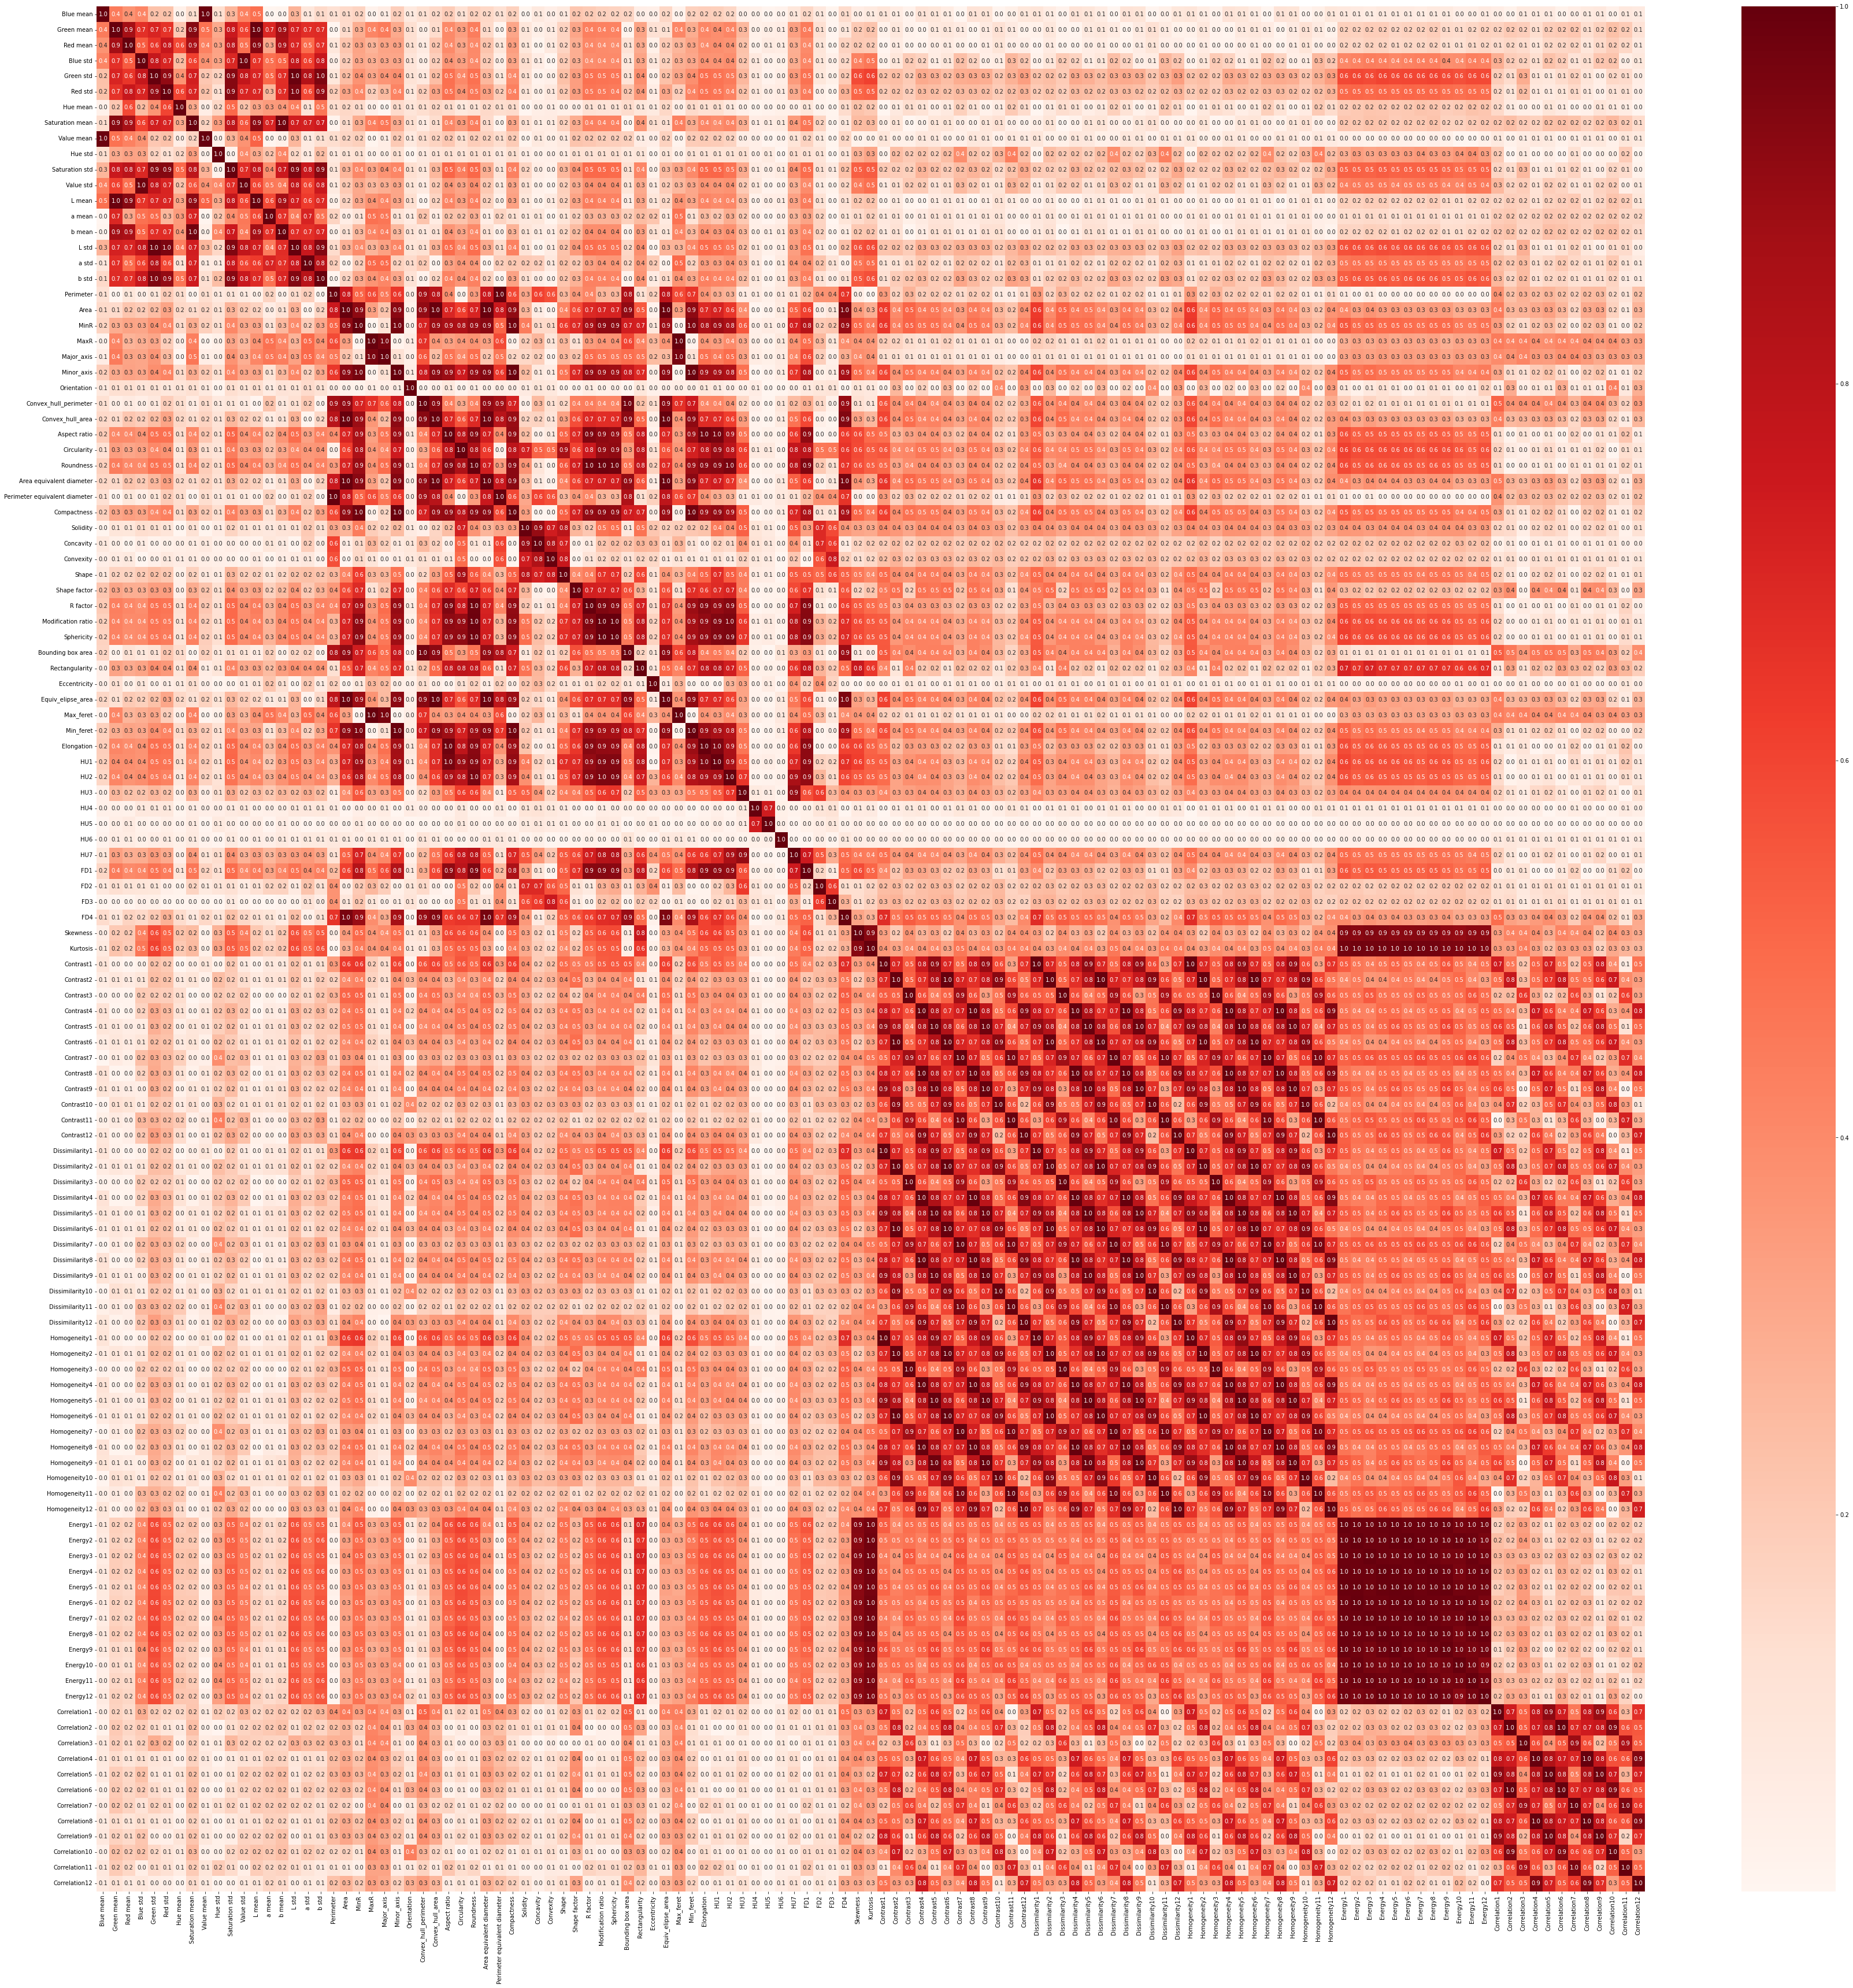

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

corr = X.corr().abs()
plt.figure(figsize=(60, 60))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt=".1f")
plt.show()

Se puede observar como existe colinealidad entre varias características diferentes. Esta podría ser una explicación
de los bajos resultados de los modelos del punto anterior.

Para solucionar este problema, se ha optado por eliminar todas aquellas características colineales que superen un
cierto umbral de correlación. Para este fin, se ha usado una adaptación de la función
[remove_collinear_features](https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/61938339#61938339)
([Synergix](https://stackoverflow.com/users/5240904/synergix)).

El umbral a partir del cual se eliminarán las características colineales es 0.6. Una vez eliminadas las características
colineales que superen este umbral, podemos volver a calcular la matriz de correlación, que ahora mostrará una baja
correlación entre características diferentes.

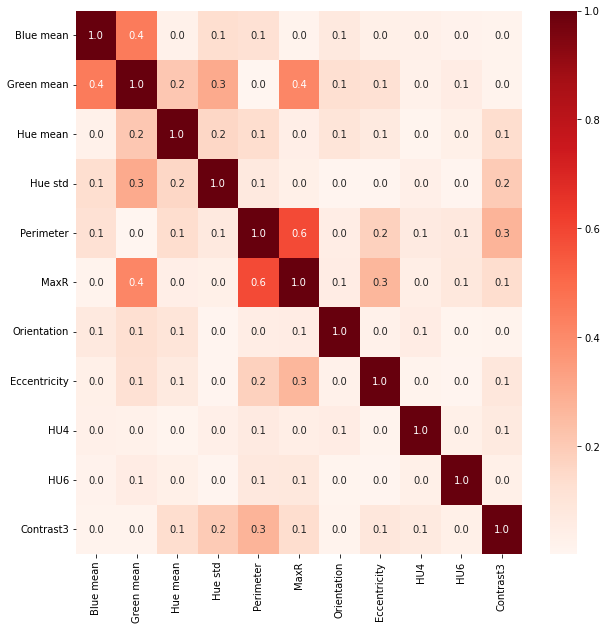

In [10]:
from feature_selection.filter_method import remove_collinear_features

remove_collinear_features(X, 0.6)
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr().abs(), annot=True, cmap=plt.cm.Reds, fmt=".1f")
plt.show()

Una vez realizado este proceso, podemos volver a entrenar los modelos del apartado anterior y comparar los nuevos
resultados de rendimiento.

### Perceptrón

In [11]:
from utils.utils import print_model_performance_metrics
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)
X_train, X_test = scale_data(X_train, X_test)
clf = SGDClassifier(loss="perceptron", eta0=1, max_iter=1000, random_state=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[38  0 12]
 [ 1 38  6]
 [ 2  2 35]]
Precision: 0.8283582089552238
Recall:    0.8283582089552238
F1 score:  0.8283582089552238


### Regresión logística

In [12]:
clf = SGDClassifier(loss="log", eta0=1, max_iter=1000, random_state=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[40  0 10]
 [ 0 44  1]
 [ 2  3 34]]
Precision: 0.8805970149253731
Recall:    0.8805970149253731
F1 score:  0.8805970149253731


### Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[50  0  0]
 [ 0 39  6]
 [ 1  6 32]]
Precision: 0.9029850746268657
Recall:    0.9029850746268657
F1 score:  0.9029850746268657


### Support Vector Machine (SVM)

In [14]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="linear", probability=True)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

print_model_performance_metrics(y_test, prediction)

[[40  0 10]
 [ 0 43  2]
 [ 2  5 32]]
Precision: 0.8582089552238806
Recall:    0.8582089552238806
F1 score:  0.8582089552238806


### Comparación

| Clasificador       | F1 Score (test split)  | F1 Score (test data)  |
| ------------------ |:----------------------:|:---------------------:|
| Perceptrón         | 0.8283                 | 0.6854                |
| Regresión logística| 0.8582                 | 0.6793                |
| Random forest      | 0.9029                 | 0.2674                |
| SVM                | 0.8582                 | 0.1367                |

Podemos observar como los modelos más afectados por la multicolinealidad son el perceptrón y la regresión logística,
cuyo _F1 score_ sobre el dataset de test ha mejorado hasta un 0.6854 y un 0.6793, respectivamente.

También cabe destacar la diferencia de la medida de rendimiento en el split de datos y en Kaggle. En concreto, esta
diferencia se aprecia significativamente en los modelos Random forest y SVM. Esta diferencia indica un claro caso de
_overfitting_ en los modelos mencionados. Es decir, los modelos están "memorizando" los datos de entrenamiento pero no
son capaces de generalizar sus predicciones.

## Ajuste de hiperparámetros en SVM

### Elección de kernel

Hasta el momento, el modelo Support Vector Machine ha tenido el peor rendimiento de los cuatro tipos de modelos que se
han entrenado.

Una de las maneras de resolver este problema, puede ser entrenar un modelo de tipo SVM con un kernel no lineal.
Los kernels disponibles son el linear (`linear`), polinómico (`poly`), función de base radial (`rbf`) y sigmoide (`sigmoid`).

Entrenaremos un modelo para cada kernel distinto y compararemos los resultados de rendimiento.

In [15]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    print("\nSVC kernel=", kernel)
    svc = SVC(C=1.0, kernel=kernel, probability=True)
    svc.fit(X_train, y_train)
    prediction = svc.predict(X_test)
    print_model_performance_metrics(y_test, prediction)


SVC kernel= linear
[[40  0 10]
 [ 0 43  2]
 [ 2  5 32]]
Precision: 0.8582089552238806
Recall:    0.8582089552238806
F1 score:  0.8582089552238806

SVC kernel= poly
[[33  2 15]
 [ 0 39  6]
 [ 0  6 33]]
Precision: 0.7835820895522388
Recall:    0.7835820895522388
F1 score:  0.783582089552239

SVC kernel= rbf
[[39  0 11]
 [ 0 40  5]
 [ 2  3 34]]
Precision: 0.8432835820895522
Recall:    0.8432835820895522
F1 score:  0.8432835820895523

SVC kernel= sigmoid
[[41  0  9]
 [ 0 42  3]
 [ 4  5 30]]
Precision: 0.8432835820895522
Recall:    0.8432835820895522
F1 score:  0.8432835820895523


#### Comparación

Una vez calculado el _F1 score_ sobre el split de datos de test, pasamos a subir los datos de Kaggle y a construir una
tabla de resultados.

| Clasificador       | F1 Score (test split)  | F1 Score (test data)  |
| ------------------ |:----------------------:|:---------------------:|
| SVM kernel lineal  | 0.8582                 | 0.1367                |
| SVM kernel poly    | 0.7835                 | 0.6656                |
| SVM kernel rbf     | 0.8432                 | 0.3000                |
| SVM kernel sigmoid | 0.8432                 | 0.5808                |

Se puede observar como los modelos con un kernel polinómico y sigmoide tienen un rendimiento bastante mejor que el
anterior modelo con un kernel lineal.

### Parámetro de regularización C

Ahora que hemos comprobado que el kernel polinómico y sigmoide son los que tienen un mayor rendimiento para este
conjunto de datos, podemos ajustar el hiperparámetro C. Entrenaremos varios modelo para los kernels polinómico y
sigmoide con los siguientes valores para C: 1, 10, 100, 1000, y 10000.

In [16]:
kernels = ["poly", "sigmoid"]
c_values = [1, 10, 100, 1000, 10000]

for kernel in kernels:
    print("\nSVC kernel=", kernel)
    for c in c_values:
        print("C=", c)
        svc = SVC(C=c, kernel=kernel, probability=True)
        svc.fit(X_train, y_train)
        prediction = svc.predict(X_test)
        print_model_performance_metrics(y_test, prediction)


SVC kernel= poly
C= 1
[[33  2 15]
 [ 0 39  6]
 [ 0  6 33]]
Precision: 0.7835820895522388
Recall:    0.7835820895522388
F1 score:  0.783582089552239
C= 10
[[35  3 12]
 [ 0 38  7]
 [ 2  5 32]]
Precision: 0.7835820895522388
Recall:    0.7835820895522388
F1 score:  0.783582089552239
C= 100
[[36  4 10]
 [ 0 38  7]
 [ 4  7 28]]
Precision: 0.7611940298507462
Recall:    0.7611940298507462
F1 score:  0.7611940298507462
C= 1000
[[36  4 10]
 [ 0 38  7]
 [ 4  7 28]]
Precision: 0.7611940298507462
Recall:    0.7611940298507462
F1 score:  0.7611940298507462
C= 10000
[[36  4 10]
 [ 0 38  7]
 [ 4  7 28]]
Precision: 0.7611940298507462
Recall:    0.7611940298507462
F1 score:  0.7611940298507462

SVC kernel= sigmoid
C= 1
[[41  0  9]
 [ 0 42  3]
 [ 4  5 30]]
Precision: 0.8432835820895522
Recall:    0.8432835820895522
F1 score:  0.8432835820895523
C= 10
[[35  1 14]
 [ 1 38  6]
 [ 5  6 28]]
Precision: 0.753731343283582
Recall:    0.753731343283582
F1 score:  0.753731343283582
C= 100
[[35  1 14]
 [ 1 39  5]


#### Comparación

Una vez calculado el rendimiento del modelo con el split sobre los datos de entrenamiento, podemos pasar a subir las
predicciones a Kaggle y comparar el rendimiento de los modelos en función del parámetro C.


| Clasificador       | C      | F1 Score (test split)  | F1 Score (test data)  |
| ------------------ |:------:|:----------------------:|:---------------------:|
| SVM kernel poly    | 1      | 0.7835                 | 0.6656                |
| SVM kernel poly    | 10     | 0.7835                 | 0.6216                |
| SVM kernel poly    | 100    | 0.7611                 | 0.6231                |
| SVM kernel poly    | 1000   | 0.7611                 | 0.6231                |
| SVM kernel poly    | 10000  | 0.7611                 | 0.6231                |
| SVM kernel sigmoid | 1      | 0.8432                 | 0.6003                |
| SVM kernel sigmoid | 10     | 0.7537                 | 0.5137                |
| SVM kernel sigmoid | 100    | 0.7985                 | 0.5152                |
| SVM kernel sigmoid | 1000   | 0.7537                 | 0.5182                |
| SVM kernel sigmoid | 10000  | 0.7985                 | 0.5182                |

## Modelo resultante

De todos los modelos de aprendizaje automático probados, el que mejor rendimiento ha dado de todos los entrenados
ha sido el perceptrón. Por este motivo, será el modelo que utilizemos en la solución final.

Para poder obtener el mayor rendimiento posible de este modelo, ajustaremos sus hiperparámetros mediante una búsqueda
exhaustiva usando GridSearchCV.

Los hiperparámetros comprobados con sus posibles valores son los siguientes:

In [17]:
params = {
    'penalty': ['None', 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'shuffle': [False, True],
    'eta0': [0.01, 0.1, 0.5, 1, 1.5]
}

A partir de este objeto de hiperparámetros, podemos obtener la mejor combinación de estos para nuestro clasificador
mediante la clase de `scikit` GridSearchCV.

In [18]:
from sklearn.model_selection import GridSearchCV

clf = SGDClassifier(loss="perceptron", max_iter=10000, random_state=5)
grid_search = GridSearchCV(clf, param_grid=params, scoring='f1_micro')

grid_search.fit(X_train, y_train)
print("Best params: {}".format(grid_search.best_params_))
print("Best f1 score: %.5f" % grid_search.best_score_)

Best params: {'alpha': 0.03, 'eta0': 0.01, 'penalty': 'l2', 'shuffle': True}
Best f1 score: 0.87783


Los resultados de este modelo son los siguientes:

| Clasificador       | F1 Score (test split)  | F1 Score (test data)  |
| ------------------ |:----------------------:|:---------------------:|
| Perceptrón         | 0.8778                 | 0.7158                |

Entrenando el modelo con el total del conjunto de entrenamiento, obtenemos un F1-score en Kaggle de 0.7204.